## **Roadway to apply linear regression model through A-Z preprocessing**

Description for the steps in this Notebook is available on https://medium.com/@gayani.nisansala.blog/machine-learning-model-from-scratch-using-weather-in-szeged-2006-2016-dataset-16edad3a1db4

### **Discovering the Dataset**
Before starting with use case, we need to explore the dataset for better understanding.

In [1]:
# importing basic python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

In [2]:
# Steps to mount the google drive to Google Colab and read the dataset from the google drive

# # mounting the google drive to Google Colab
# from google.colab import drive
# drive.mount("/content/gdrive")

# # read .csv file by .read_csv() funtion and create a dataframe
# weather_dataset = pd.read_csv("/content/gdrive/My Drive/ML Data/weatherHistory.csv")
# weather_dataset.head(5)

In [3]:
# read .csv file by .read_csv() funtion and create a dataframe
weather_dataset = pd.read_csv("weatherHistory.csv")
weather_dataset.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
# gives a concise summary of the weather_dataset dataframe
weather_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
# Gives a descriptive statistics about the weather_dataset dataframe
weather_dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
# shows how the data are grouped in "Loud Cover" feature and able to identify 'Loud Cover' feature only exists value 0
weather_dataset['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [7]:
# drop 'Loud Cover' and 'Daily Summary' features from the weather_dataset dataframe.
weather_dataset=weather_dataset.drop(['Loud Cover','Daily Summary'],axis=1)

### **Handling Missing Values**

In [8]:
# display the no of null values that are available in each feature within the weather_dataset dataframe
weather_dataset.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [9]:
# shows how the data are grouped in "Precip Type" feature
weather_dataset['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [10]:
# drop all the rows which are having null values(In here only droping rows which are having null values for 'Precip Type' feature.)
df1 = weather_dataset.dropna()

In [11]:
# displaying shape(row count,column count) before and after droping missing values
print(f"shape of the 'weather_dataset' dataframe : {weather_dataset.shape}")
print(f"shaped of the 'df1' dataframe : {df1.shape}")

shape of the 'weather_dataset' dataframe : (96453, 10)
shaped of the 'df1' dataframe : (95936, 10)


In [12]:
df1.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

### **Handling Outliers**

<AxesSubplot:xlabel='Temperature (C)'>

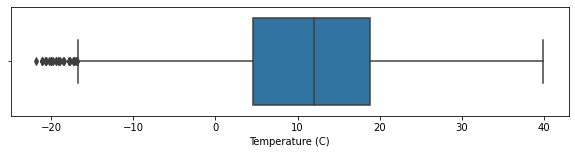

In [13]:
# box plot for feature 'Temperature (C)'
plt.figure(figsize=(10,2))
sns.boxplot(df1['Temperature (C)'])

<AxesSubplot:xlabel='Apparent Temperature (C)'>

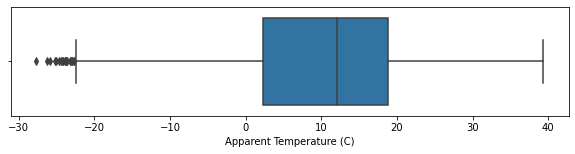

In [14]:
# box plot for feature 'Apparent Temperature (C)'
plt.figure(figsize=(10,2))
sns.boxplot(df1['Apparent Temperature (C)'])

<AxesSubplot:xlabel='Humidity'>

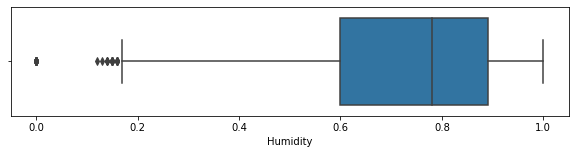

In [15]:
# box plot for feature 'Humidity'
plt.figure(figsize=(10,2))
sns.boxplot(df1['Humidity'])

<AxesSubplot:xlabel='Wind Speed (km/h)'>

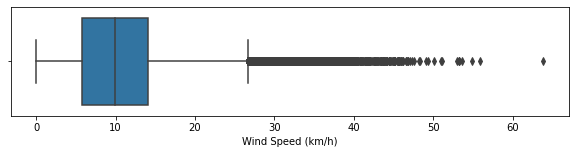

In [16]:
# box plot for feature 'Wind Speed (km/h)'
plt.figure(figsize=(10,2))
sns.boxplot(df1['Wind Speed (km/h)'])

<AxesSubplot:xlabel='Wind Bearing (degrees)'>

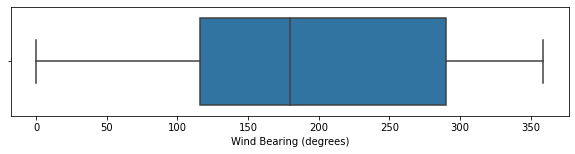

In [17]:
# box plot for feature 'Wind Bearing (degrees)'
plt.figure(figsize=(10,2))
sns.boxplot(df1['Wind Bearing (degrees)'])

<AxesSubplot:xlabel='Visibility (km)'>

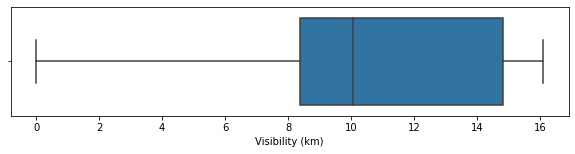

In [18]:
# box plot for feature 'Visibility (km)'
plt.figure(figsize=(10,2))
sns.boxplot(df1['Visibility (km)'])

<AxesSubplot:xlabel='Pressure (millibars)'>

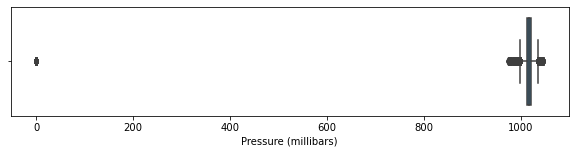

In [19]:
# box plot for feature 'Pressure (millibars)'
plt.figure(figsize=(10,2))
sns.boxplot(df1['Pressure (millibars)'])

<AxesSubplot:xlabel='Pressure (millibars)'>

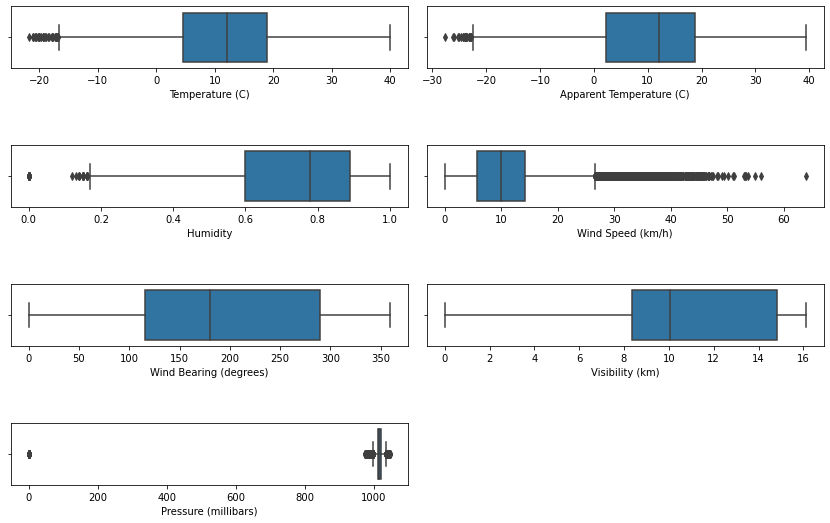

In [20]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,7))
plt.subplot(4,2,1)
plt.tight_layout(h_pad=6)
sns.boxplot(df1['Temperature (C)'])

plt.subplot(4,2,2)
sns.boxplot(df1['Apparent Temperature (C)'])

plt.subplot(4,2,3)
sns.boxplot(df1['Humidity'])

plt.subplot(4,2,4)
sns.boxplot(df1['Wind Speed (km/h)'])

plt.subplot(4,2,5)
sns.boxplot(df1['Wind Bearing (degrees)'])

plt.subplot(4,2,6)
sns.boxplot(df1['Visibility (km)'])

plt.subplot(4,2,7)
sns.boxplot(df1['Pressure (millibars)'])

In [21]:
# define the min and max values of data spread to filter out outliers
min_value = df1.quantile(0.05)
max_value = df1.quantile(0.95)

In [22]:
# display the shape of the dataframes which includes the data within the range less than minimum quantile or greater than the maximum quantile.
eligible_outliers_humidity = df1[(df1['Humidity']<min_value['Humidity']) | (df1['Humidity']>max_value['Humidity'])].shape
eligible_outliers_windspeed = df1[(df1['Wind Speed (km/h)']<min_value['Wind Speed (km/h)']) | (df1['Wind Speed (km/h)']>max_value['Wind Speed (km/h)'])].shape
eligible_outliers_pressure = df1[(df1['Pressure (millibars)']<min_value['Pressure (millibars)']) | (df1['Pressure (millibars)']>max_value['Pressure (millibars)'])].shape

print(f"shape of the dataframes which includes all outliers need to be removed in features --> Humidity : {eligible_outliers_humidity} Wind Speed : {eligible_outliers_windspeed} Pressure : {eligible_outliers_pressure}")

shape of the dataframes which includes all outliers need to be removed in features --> Humidity : (9121, 10) Wind Speed : (9575, 10) Pressure : (9589, 10)


In [23]:
# removing outliers
df_without_outliers = df1[(df1['Wind Speed (km/h)']>min_value['Wind Speed (km/h)']) & (df1['Wind Speed (km/h)']<max_value['Wind Speed (km/h)']) & (df1['Humidity']>min_value['Humidity']) & (df1['Humidity']<max_value['Humidity'])& (df1['Pressure (millibars)']>min_value['Pressure (millibars)']) & (df1['Pressure (millibars)']<max_value['Pressure (millibars)'])]

In [24]:
# displaying shape(row count,column count) before and after removing outliers.
print(f"shape of the dataframe before removing outliers : {df1.shape}")
print(f"shape of the dataframe after removing outliers : {df_without_outliers.shape}")

shape of the dataframe before removing outliers : (95936, 10)
shape of the dataframe after removing outliers : (69827, 10)


<AxesSubplot:xlabel='Pressure (millibars)'>

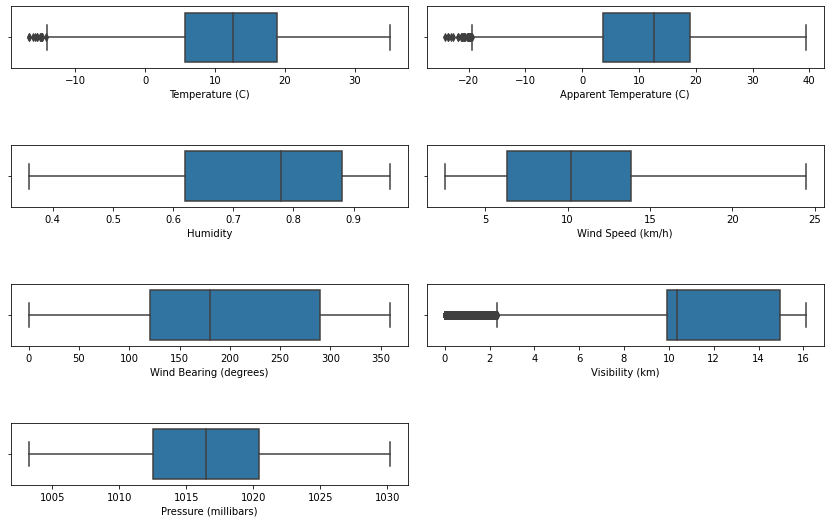

In [25]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,7))
plt.subplot(4,2,1)
plt.tight_layout(h_pad=6)
sns.boxplot(df_without_outliers['Temperature (C)'])

plt.subplot(4,2,2)
sns.boxplot(df_without_outliers['Apparent Temperature (C)'])

plt.subplot(4,2,3)
sns.boxplot(df_without_outliers['Humidity'])

plt.subplot(4,2,4)
sns.boxplot(df_without_outliers['Wind Speed (km/h)'])

plt.subplot(4,2,5)
sns.boxplot(df_without_outliers['Wind Bearing (degrees)'])

plt.subplot(4,2,6)
sns.boxplot(df_without_outliers['Visibility (km)'])

plt.subplot(4,2,7)
sns.boxplot(df_without_outliers['Pressure (millibars)'])

In [26]:
df_without_outliers.head(5)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [27]:
# function to change the data type to 'category' before applying data codings.
def change_dtype(before_coding):
  before_coding['Summary'] = before_coding['Summary'].astype('category')
  before_coding['Precip Type'] = before_coding['Precip Type'].astype('category')

In [28]:
# calling the function
change_dtype(df_without_outliers)

In [29]:
#shows how the data are grouped in "Precip Type" feature and 'Summary' feature
distinct_values_precip = len(df_without_outliers['Precip Type'].value_counts())
distinct_values_summary = len(df_without_outliers['Summary'].value_counts())

print(f"distinct values of 'Precip Type' : {distinct_values_precip} \ndistinct values of 'Summary' : {distinct_values_summary} \n")

distinct values of 'Precip Type' : 2 
distinct values of 'Summary' : 11 



In [30]:
# funtion to encode features 'Summary' and 'Precip Type'
def encode_features(before_coding):
  encoded_df_1 = pd.get_dummies(before_coding['Summary'])
  encoded1 = pd.concat([before_coding,encoded_df_1],axis=1)

  encoded_df_2 = pd.get_dummies(before_coding['Precip Type'])
  encoded2 = pd.concat([before_coding,encoded_df_2],axis=1)

  df_new=pd.concat([encoded1,encoded2.iloc[:,-2:]],axis=1)
  coded_df = df_new.drop(['Formatted Date','Summary','Precip Type'],axis=1)
  return coded_df

In [31]:
# calling the function
df_without_outliers= encode_features(df_without_outliers)

In [32]:
df_without_outliers.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Clear,Drizzle,Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,rain,snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,0,0,0,0,0,1,0,1,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,0,0,0,0,0,1,0,1,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,0,0,0,0,1,0,0,0,1,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,0,0,0,0,0,1,0,1,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,0,0,0,0,1,0,0,0,1,0


### **Identify independent and dependent variables**

In [33]:
# selecting X with all independent variables and y with dependent variable
X=pd.concat([df_without_outliers.iloc[:,0],df_without_outliers.iloc[:,2:]],axis=1)
y=df_without_outliers.iloc[:,1]

In [34]:
X.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Clear,Drizzle,Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,rain,snow
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,0,0,0,0,0,1,0,1,0
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,0,0,0,0,0,1,0,1,0
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,0,0,0,0,1,0,0,0,1,0
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,0,0,0,0,0,1,0,1,0
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,0,0,0,0,1,0,0,0,1,0


In [35]:
y.head()

0    7.388889
1    7.227778
2    9.377778
3    5.944444
4    6.977778
Name: Apparent Temperature (C), dtype: float64

### **Splitting Dataset to Train and Test**

In [36]:
# Splitting the dataset to X_train, X_test, y_train and y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

### **Data Transformations**

In [37]:
#function to display probability plots for each feature available in the dataframe
def display_probplots_x(df):
  df_without_outliers=df
  plt.figure(figsize=(15,7))
  plt.tight_layout(h_pad=6)

  ax2=plt.subplot(4,2,1)
  stats.probplot(df_without_outliers['Temperature (C)'], dist="norm", plot=plt)
  ax2.set_title("Apparent Temperature (C)")

  ax3=plt.subplot(4,2,2)
  stats.probplot(df_without_outliers['Humidity'], dist="norm", plot=plt)
  ax3.set_title("Humidity")

  ax4=plt.subplot(4,2,3)
  stats.probplot(df_without_outliers['Wind Speed (km/h)'], dist="norm", plot=plt)
  ax4.set_title('Wind Speed (km/h)')

  ax5=plt.subplot(4,2,4)
  stats.probplot(df_without_outliers['Wind Bearing (degrees)'], dist="norm", plot=plt)
  ax5.set_title('Wind Bearing (degrees)')

  ax6=plt.subplot(4,2,5)
  stats.probplot(df_without_outliers['Visibility (km)'], dist="norm", plot=plt)
  ax6.set_title('Visibility (km)')

  ax7=plt.subplot(4,2,6)
  stats.probplot(df_without_outliers['Pressure (millibars)'], dist="norm", plot=plt)
  ax7.set_title('Pressure (millibars)')

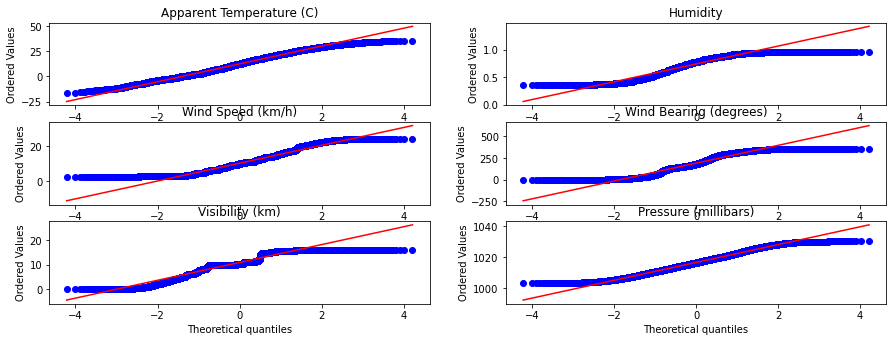

In [38]:
# calling the function
display_probplots_x(X_train)

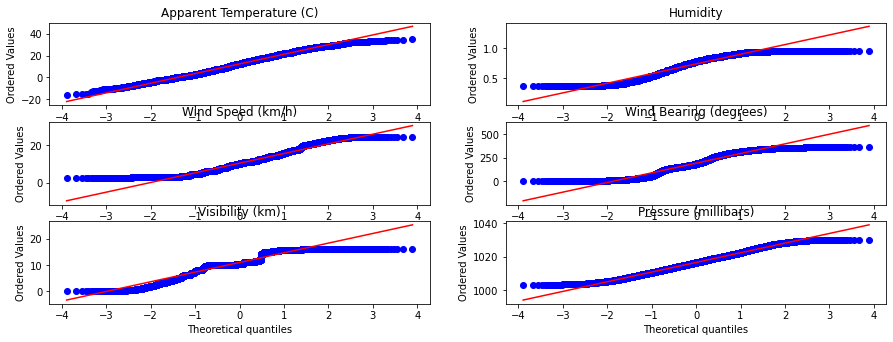

In [39]:
# calling the function
display_probplots_x(X_test)

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>],
       [<AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>]],
      dtype=object)

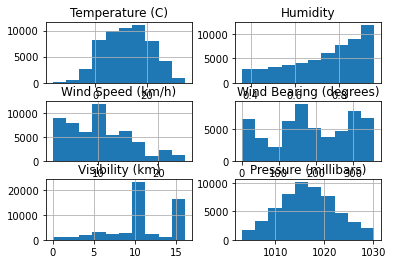

In [40]:
# drawing the histograms for numerical features within the X_train dataframe
X_train.iloc[:,:6].hist()

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>],
       [<AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>]],
      dtype=object)

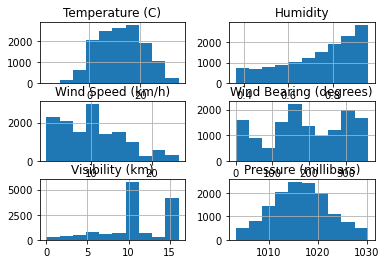

In [41]:
# drawing the histograms for numerical features within the X_test dataframe
X_test.iloc[:,:6].hist()

In [42]:
# Applying exponential transformer to left skewed 'Humidity' feature 
from sklearn.preprocessing import FunctionTransformer

def exp_transformer(df):
  df_without_outliers=df
  exp_transformer = FunctionTransformer(np.exp)

  transformed_humidity = exp_transformer.transform(df_without_outliers[['Humidity']])
  df_without_outliers['Humidity']=transformed_humidity['Humidity']
  return df_without_outliers

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>],
       [<AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>]],
      dtype=object)

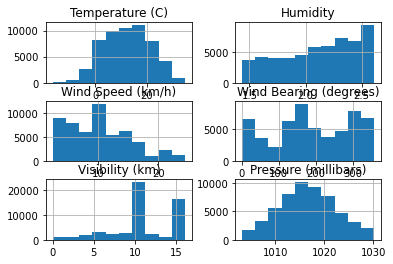

In [43]:
# calling the function to transform X_train dataframe and displaying the histograms to visualize the changes of the distribution in the 'Humidity' feature.
X_trained_transformed = exp_transformer(X_train)
X_trained_transformed.iloc[:,:6].hist()

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>],
       [<AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>]],
      dtype=object)

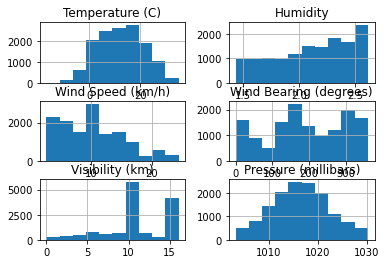

In [44]:
# calling the function to transform X_test dataframe and displaying the histograms to visualize the changes of the distribution in the 'Humidity' feature.
X_test_transformed = exp_transformer(X_test)

X_test_transformed.iloc[:,:6].hist()

In [45]:
# Applying log transformer to left skewed 'Humidity' feature 
from sklearn.preprocessing import FunctionTransformer

def log_transformer(df):
  df_without_outliers=df
  logarithm_transformer = FunctionTransformer(np.log1p)
  transformed_windspeed = logarithm_transformer.transform(df_without_outliers['Wind Speed (km/h)'])
  df_without_outliers['Wind Speed (km/h)']=transformed_windspeed
  return df_without_outliers

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>],
       [<AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>]],
      dtype=object)

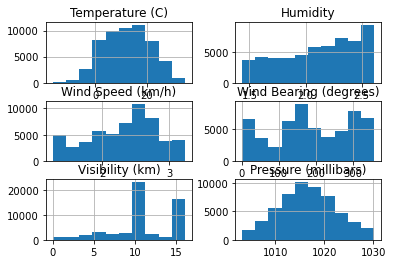

In [46]:
# calling the log_transformer() function to transform X_train dataframe and displaying the histograms to visualize the changes of the distribution in the 'Wind Speed (km/h)' feature.
X_trained_transformed=log_transformer(X_train)
X_trained_transformed.iloc[:,:6].hist()

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>],
       [<AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>]],
      dtype=object)

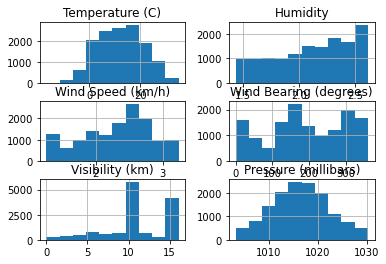

In [47]:
# calling the log_transformer() function to transform X_test dataframe and displaying the histograms to visualize the changes of the distribution in the 'Wind Speed (km/h)' feature.
X_test_transformed=log_transformer(X_test)
X_test_transformed.iloc[:,:6].hist()

In [48]:
X_trained_transformed.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Clear,Drizzle,Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,rain,snow
83441,22.938889,1.934792,2.364987,266.0,10.3523,1009.40,0,0,0,0,0,0,0,0,0,1,0,1,0
94707,1.783333,2.459603,2.454628,153.0,4.9910,1019.54,0,0,0,0,0,0,0,1,0,0,0,1,0
31084,13.333333,2.611696,1.439835,180.0,9.9820,1008.10,0,0,0,0,0,0,0,0,0,1,0,1,0
41249,16.300000,2.363161,2.340488,350.0,10.0464,1016.48,0,0,0,0,0,0,0,1,0,0,0,1,0
2074,7.894444,2.270500,2.524071,166.0,7.0518,1015.83,0,0,0,0,0,0,0,0,1,0,0,1,0


In [49]:
X_test_transformed.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Clear,Drizzle,Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,rain,snow
4789,28.955556,1.786038,2.216896,63.0,11.2700,1017.58,0,0,0,0,0,0,0,0,0,1,0,1,0
35840,19.822222,2.316367,1.840057,337.0,9.9015,1017.87,0,0,0,0,0,0,0,0,0,1,0,1,0
18321,23.761111,1.521962,1.400937,120.0,9.9820,1013.46,0,0,0,0,0,0,0,0,0,1,0,1,0
10073,22.111111,1.768267,2.698814,43.0,11.4471,1012.16,0,0,0,0,0,0,0,0,0,1,0,1,0
5416,14.961111,1.491825,2.381489,251.0,10.3523,1008.43,0,0,0,0,0,0,0,0,1,0,0,1,0


In [50]:
#function to display probability plots for each feature available in the dataframe
def display_probplots_y(df):
  df_without_outliers=df
  plt.figure(figsize=(15,7))
  plt.tight_layout(h_pad=6)

  ax2=plt.subplot(4,2,1)
  stats.probplot(df_without_outliers, dist="norm", plot=plt)
  ax2.set_title("Apparent Temperature (C)")

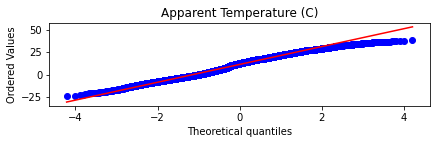

In [51]:
# calling the function
display_probplots_y(y_train) #seems no need to apply transformations

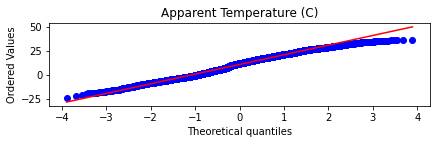

In [52]:
# calling the function
display_probplots_y(y_test)#seems no need to apply transformations

<AxesSubplot:>

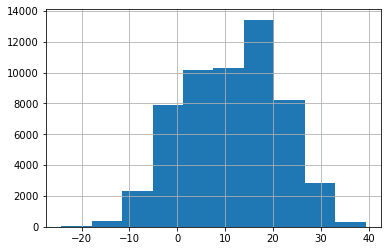

In [53]:
y_train.hist()

<AxesSubplot:>

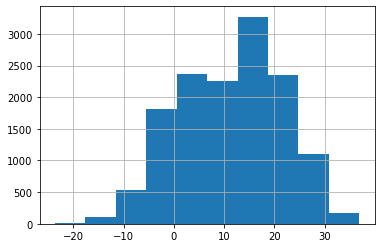

In [54]:
y_test.hist()

### **Feature Scaling**

In [55]:
# Standarize features except encoded features in the train datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
standarized_np_X_train = X_trained_transformed.values
standarized_np_X_train[:,:6] = scaler.fit_transform(X_trained_transformed.iloc[:,:6])

standarized_np_X_test = X_test_transformed.values
standarized_np_X_test[:,:6] = scaler.transform(X_test_transformed.iloc[:,:6])

standarized_np_y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

standarized_np_y_test = scaler.transform(y_test.values.reshape(-1,1))

In [56]:
# transform numpy array to dataframe.
normalised_df_X_train=pd.DataFrame(standarized_np_X_train,columns=X_trained_transformed.columns)
normalised_df_X_test=pd.DataFrame(standarized_np_X_test,columns=X_test_transformed.columns)
normalised_df_y_train=pd.DataFrame(standarized_np_y_train,columns=['Apparent Temperature (C)'])
normalised_df_y_test=pd.DataFrame(standarized_np_y_test,columns=['Apparent Temperature (C)'])

In [57]:
normalised_df_X_train.head()


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Clear,Drizzle,Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,rain,snow
0,1.187345,-0.555824,0.087950,0.720398,-0.151366,-1.241992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.195630,0.993786,0.269016,-0.349691,-1.549379,0.512085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.105370,1.442872,-1.780771,-0.094006,-0.247926,-1.466873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.439537,0.709020,0.038464,1.515863,-0.231133,-0.017252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.507270,0.435420,0.409286,-0.226584,-1.012005,-0.129693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [58]:
normalised_df_X_test.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Clear,Drizzle,Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,rain,snow
0,1.865067,-0.995050,-0.211179,-1.201975,0.087933,0.173032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.836282,0.570852,-0.972359,1.392755,-0.268917,0.223198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.279961,-1.774790,-1.859343,-0.662195,-0.247926,-0.539669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.094104,-1.047524,0.762251,-1.391371,0.134114,-0.764551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.288724,-1.863776,0.121282,0.578351,-0.151366,-1.409788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [59]:
normalised_df_y_train.head()

,Apparent Temperature (C)
0,1.140337
1,-1.262873
2,0.188631
3,0.482565
4,-0.551157


In [60]:
normalised_df_y_test.head()

,Apparent Temperature (C)
0,1.910950
1,0.831542
2,1.221802
3,1.058322
4,0.349909


### **Identifying significant and independent features**

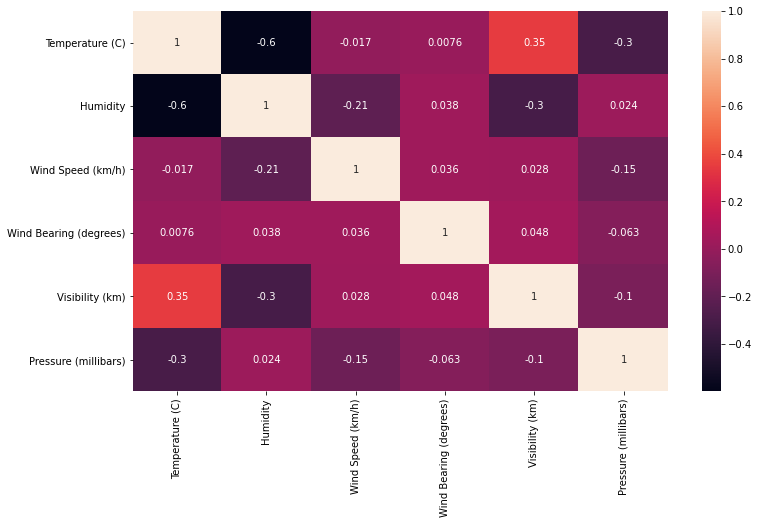

In [61]:
# Checking the features of X are independent or not
import seaborn as sns
plt.figure(figsize=(12,7))
sns.heatmap(X.iloc[:,:6].corr(),annot=True); #seems the features are independent.

We can identify that the features are not highly correlated with other features. So we can tell that the features are independent. If there is a highly correlated feature set available, one feature from those highly correlated set can be removed. Because one feature may be a derived variable of another. However, before removing a feature, we need to be well-familiarized about the dataset. Though there can be a high correlation between variables, it can be the case where one feature cannot be derived from the other one.

                        Temperature (C)  Humidity  Wind Speed (km/h)  \
Temperature (C)                1.000000 -0.598898          -0.017217   
Humidity                      -0.598898  1.000000          -0.206519   
Wind Speed (km/h)             -0.017217 -0.206519           1.000000   
Wind Bearing (degrees)         0.007572  0.037933           0.035836   
Visibility (km)                0.345348 -0.300023           0.028046   
Pressure (millibars)          -0.296969  0.023962          -0.150271   
Apparent Temperature           0.994357 -0.574879          -0.072181   

                        Wind Bearing (degrees)  Visibility (km)  \
Temperature (C)                       0.007572         0.345348   
Humidity                              0.037933        -0.300023   
Wind Speed (km/h)                     0.035836         0.028046   
Wind Bearing (degrees)                1.000000         0.047680   
Visibility (km)                       0.047680         1.000000   
Pressure (millibars) 

<AxesSubplot:>

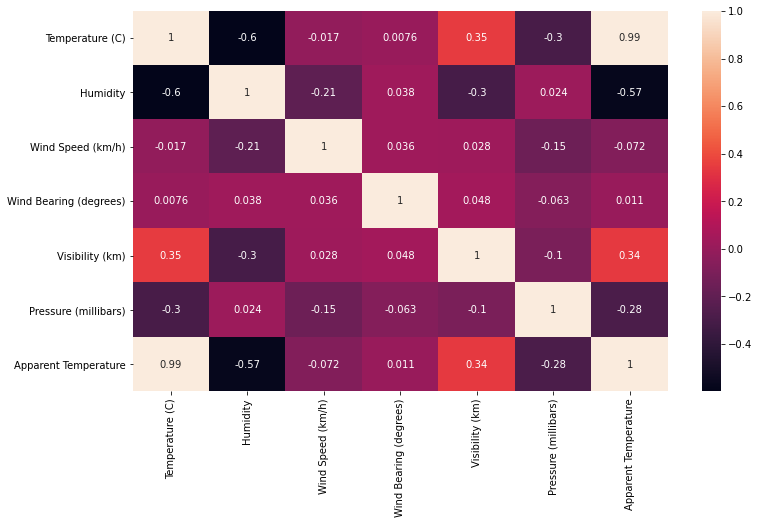

In [62]:
#testinf the signifncance of the features
plt.figure(figsize=(12,7))
x_data = X.iloc[:,:6].copy()
x_data['Apparent Temperature'] = y
print(x_data.corr())
sns.heatmap(x_data.corr(),annot=True) #Seems features are signifncant


From the above heatmap, we can see that the features such as 'temperature', 'Humidity', 'Visibility' are significant. Because they have high correlation with the dependent variable('Apparent Temperature').



But this approach is not good for huge datasets. Because we have to manually go through each and every correlation value to select significant features. It's a tedious task. Don't worry, we have an amazing technique called 'Principle Component Analysis(PCA)'.

### **Applying Principle Component Analysis (PCA)**

In [63]:
# Applying PCA to normalised X_train dataframe
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(normalised_df_X_train)

In [64]:
# get the variance ratio array.
explained_variance=pca.explained_variance_ratio_
explained_variance

array([2.93824185e-01, 1.62120976e-01, 1.47707108e-01, 1.35647719e-01,
       1.05222452e-01, 4.67477973e-02, 4.53945093e-02, 2.68135936e-02,
       1.70432395e-02, 1.41007729e-02, 5.02328147e-03, 1.42602847e-04,
       8.02922212e-05, 6.08709160e-05, 4.21616920e-05, 1.72748684e-05,
       1.11636314e-05, 1.40969460e-33, 2.83775396e-34])

In [65]:
# function too get no of significant features to be selected from the above variance ratio array
def count_dimension(arr1):
  print(arr1)
  sum=0
  count=0
  for i in arr1:
    sum+=i
    count +=1
    if(sum>=0.95):
      return count
  return -1
    

In [66]:
print(f"No of features needed to be extracted : {count_dimension(explained_variance)}")

[2.93824185e-01 1.62120976e-01 1.47707108e-01 1.35647719e-01
 1.05222452e-01 4.67477973e-02 4.53945093e-02 2.68135936e-02
 1.70432395e-02 1.41007729e-02 5.02328147e-03 1.42602847e-04
 8.02922212e-05 6.08709160e-05 4.21616920e-05 1.72748684e-05
 1.11636314e-05 1.40969460e-33 2.83775396e-34]
No of features needed to be extracted : 8


In [67]:
#selecting no of features as 8 and apply PCA
pca=PCA(n_components=8)
X_train_pca=pca.fit_transform(normalised_df_X_train)
X_test_pca=pca.transform(normalised_df_X_test)

In [68]:
#Applying linear regression model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
model= regressor.fit(X_train_pca,normalised_df_y_train)

In [69]:
# get y predictions to the given X_test_pca
y_pred =regressor.predict(X_test_pca)
y_pred

array([[ 1.77390486],
       [ 0.86675819],
       [ 1.37826599],
       ...,
       [-0.03924672],
       [ 1.96663285],
       [ 1.56295588]])

### **Evaluating the regression Model**

To evaluate the linear regression model, I am using following measures.
<ul>
<li>Mean Squared Error(MSE)</li>
<li>Root Mean Squared Error(RMSE)</li>
<li>Mean Absolute Error(MASE)</li>
</ul>

In [70]:
# r2 score of the model
from sklearn import metrics
accuracy = metrics.r2_score(normalised_df_y_test, y_pred)
accuracy

0.9850936532317174

In [71]:
# Root Mean Square Error of the model
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(normalised_df_y_test, y_pred))
rmse

0.12245368465805054

In [72]:
# Mean Square Error of the model
from math import sqrt
mse = mean_squared_error(normalised_df_y_test, y_pred)
mse

0.014994904886333281

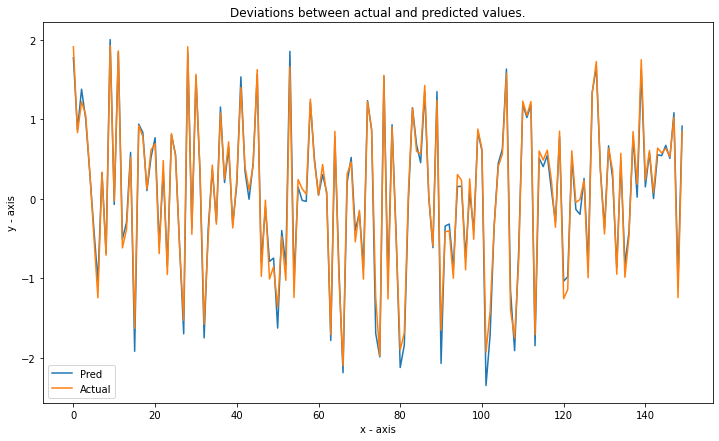

In [73]:
# Displaying deviations between actual and predicted values from a graph
plt.figure(figsize=(12,7))
finaldataframe =pd.DataFrame({'actual':normalised_df_y_test.values[:,0],'prediction':y_pred[:,0]})

finaldataframe2=finaldataframe.reset_index(drop=True)
plt.plot(finaldataframe2['prediction'][:150], label = "Pred")
plt.plot(finaldataframe2['actual'][:150], label = "Actual")
plt.xlabel('x - axis')

plt.ylabel('y - axis')

plt.title('Deviations between actual and predicted values.')

plt.legend()

plt.show()

In [74]:
# intercept of the linear model
regressor.intercept_

array([-1.84956791e-16])

In [75]:
# coefficients of the linear model
regressor.coef_

array([[-0.58246915, -0.15546092, -0.14896864,  0.20234077,  0.36747612,
        -0.23579694, -0.55108757,  0.04299515]])

### **Applying Linear Regression Model Without PCA**

In [76]:
#Applying linear regression model
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression()
model= regressor1.fit(normalised_df_X_train.values,normalised_df_y_train.values) # independent feature 'Humidity' and dependent feature 'Apparent temperature'

In [77]:
# get y predictions to the given normalised_df_X_test
y_pred1 =regressor1.predict(normalised_df_X_test.values)
y_pred1

array([[ 1.85231353],
       [ 0.89760708],
       [ 1.34851582],
       ...,
       [-0.05284907],
       [ 2.06013719],
       [ 1.58423577]])

In [78]:
# r2 score of the model
from sklearn import metrics
accuracy = metrics.r2_score(normalised_df_y_test, y_pred1)
accuracy

0.9921883370102922

In [79]:
# Root Mean Square Error of the model
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(normalised_df_y_test, y_pred1))
rmse

0.08864576596623977

In [80]:
# Mean Square Error of the model
from math import sqrt
mse = mean_squared_error(normalised_df_y_test, y_pred1)
mse

0.007858071823741352

In [81]:
# intercept of the linear model
regressor1.intercept_

array([-0.02060485])

In [82]:
# coefficients of the linear model
regressor1.coef_

array([[ 0.995113  ,  0.01070545, -0.05422324,  0.00437068,  0.00177379,
         0.00608443, -0.00697161,  0.02082171,  0.02775801, -0.01248659,
        -0.02203503, -0.03392828,  0.02023733,  0.00124995, -0.00217751,
        -0.00724368,  0.01477568,  0.02745633, -0.02745633]])

In [83]:
predicted_appearent_temp =  regressor1.predict([[9,0.83,11,259,15.8263,1016.51,0,0,0,0,0,0,0,1,0,0,0,1,0]])
predicted_appearent_temp

array([[15.72150674]])